Машины опорных векторов (сокращенно SVM) — это контролируемые алгоритмы машинного обучения, которые используются для целей классификации и регрессии. В этом задании вам необходимо обучить Support Vector Machines для классификации пульсаров. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Прочитайте данные, сделайте беглый EDA - посмотрите на кол-во данных, названия столбцов, нет ли в них ошибок, переименуйте для более удобной работы, есть ли пропущенные значения. Посмотрите нет ли дисбаланса классов по таргету? Сделайте саммари по признакам. Отобразите боксплоты признаков, чтобы оценить выбросы в данных. Постройте гистограммы признаков, чтобы взглянуть на распределение данных.**

In [2]:
data = pd.read_csv('pulsar_data_train.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [3]:
data.shape

(12528, 9)

In [4]:
col = ['Mean_int', 'Std_int', 'Excess_int', 'Skew_int',
       'Mean_DM_SNR', 'Std_DM_SNR', 'Excess_DM_SNR', 'Skew_DM_SNR', 'target']
data.columns = col

In [5]:
data.isnull().sum()

Mean_int            0
Std_int             0
Excess_int       1735
Skew_int            0
Mean_DM_SNR         0
Std_DM_SNR       1178
Excess_DM_SNR       0
Skew_DM_SNR       625
target              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mean_int       12528 non-null  float64
 1   Std_int        12528 non-null  float64
 2   Excess_int     10793 non-null  float64
 3   Skew_int       12528 non-null  float64
 4   Mean_DM_SNR    12528 non-null  float64
 5   Std_DM_SNR     11350 non-null  float64
 6   Excess_DM_SNR  12528 non-null  float64
 7   Skew_DM_SNR    11903 non-null  float64
 8   target         12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [7]:
for col in data.columns:
    print(data[col]. value_counts())

106.710938    8
129.210938    7
105.242188    7
124.429688    7
123.031250    7
             ..
96.781250     1
39.648438     1
132.140625    1
164.640625    1
135.664062    1
Name: Mean_int, Length: 7192, dtype: int64
44.024851    2
47.343551    2
49.196907    2
44.774773    2
48.622178    2
            ..
49.415603    1
52.590514    1
55.792865    1
50.080199    1
50.472256    1
Name: Std_int, Length: 12510, dtype: int64
 0.375485    1
-0.122189    1
 0.394809    1
-0.299902    1
 0.231473    1
            ..
-0.097628    1
 4.352559    1
 0.359590    1
 0.182674    1
 0.346178    1
Name: Excess_int, Length: 10793, dtype: int64
-0.013165     1
 0.853675     1
 13.442730    1
 0.425261     1
 12.004138    1
             ..
 0.700148     1
-0.012042     1
-0.246956     1
-0.630294     1
 0.184797     1
Name: Skew_int, Length: 12528, dtype: int64
2.086120     10
2.050167     10
2.290134      9
2.567726      8
1.947324      8
             ..
1.045987      1
42.732441     1
3.897157      

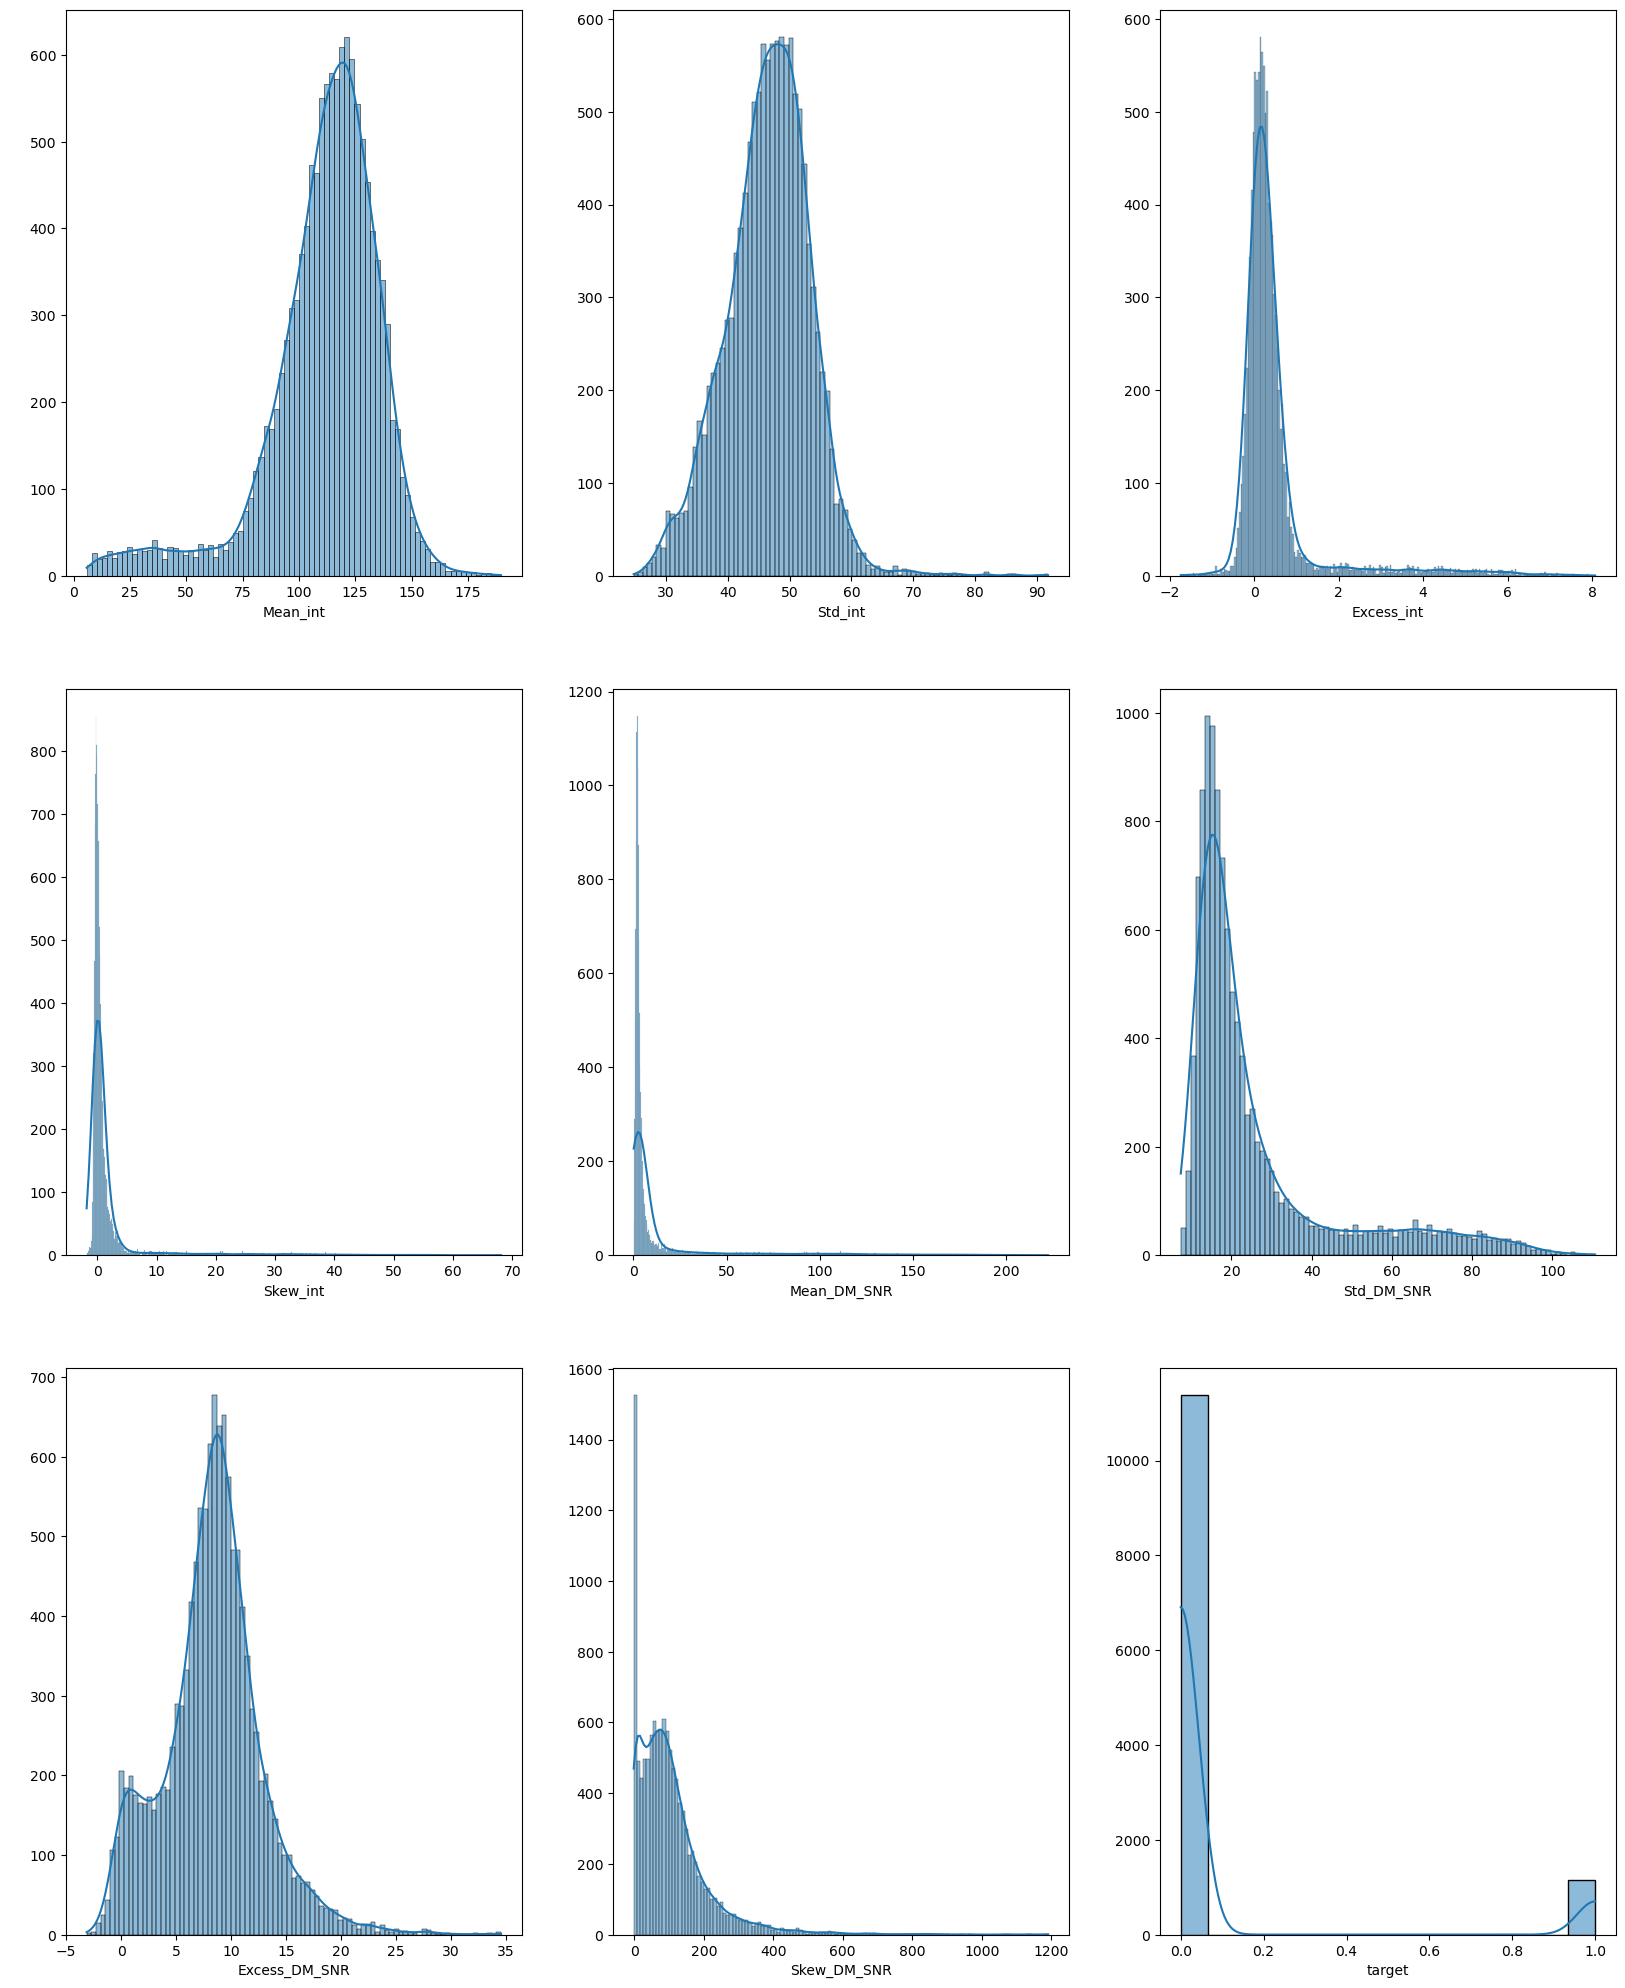

In [8]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data[col], kde = True)
    plt.ylabel(" ")
    plotnumber +=1
plt.show()

In [9]:
for col in data.columns:
    data[col].fillna(data[col].median(), inplace = True)

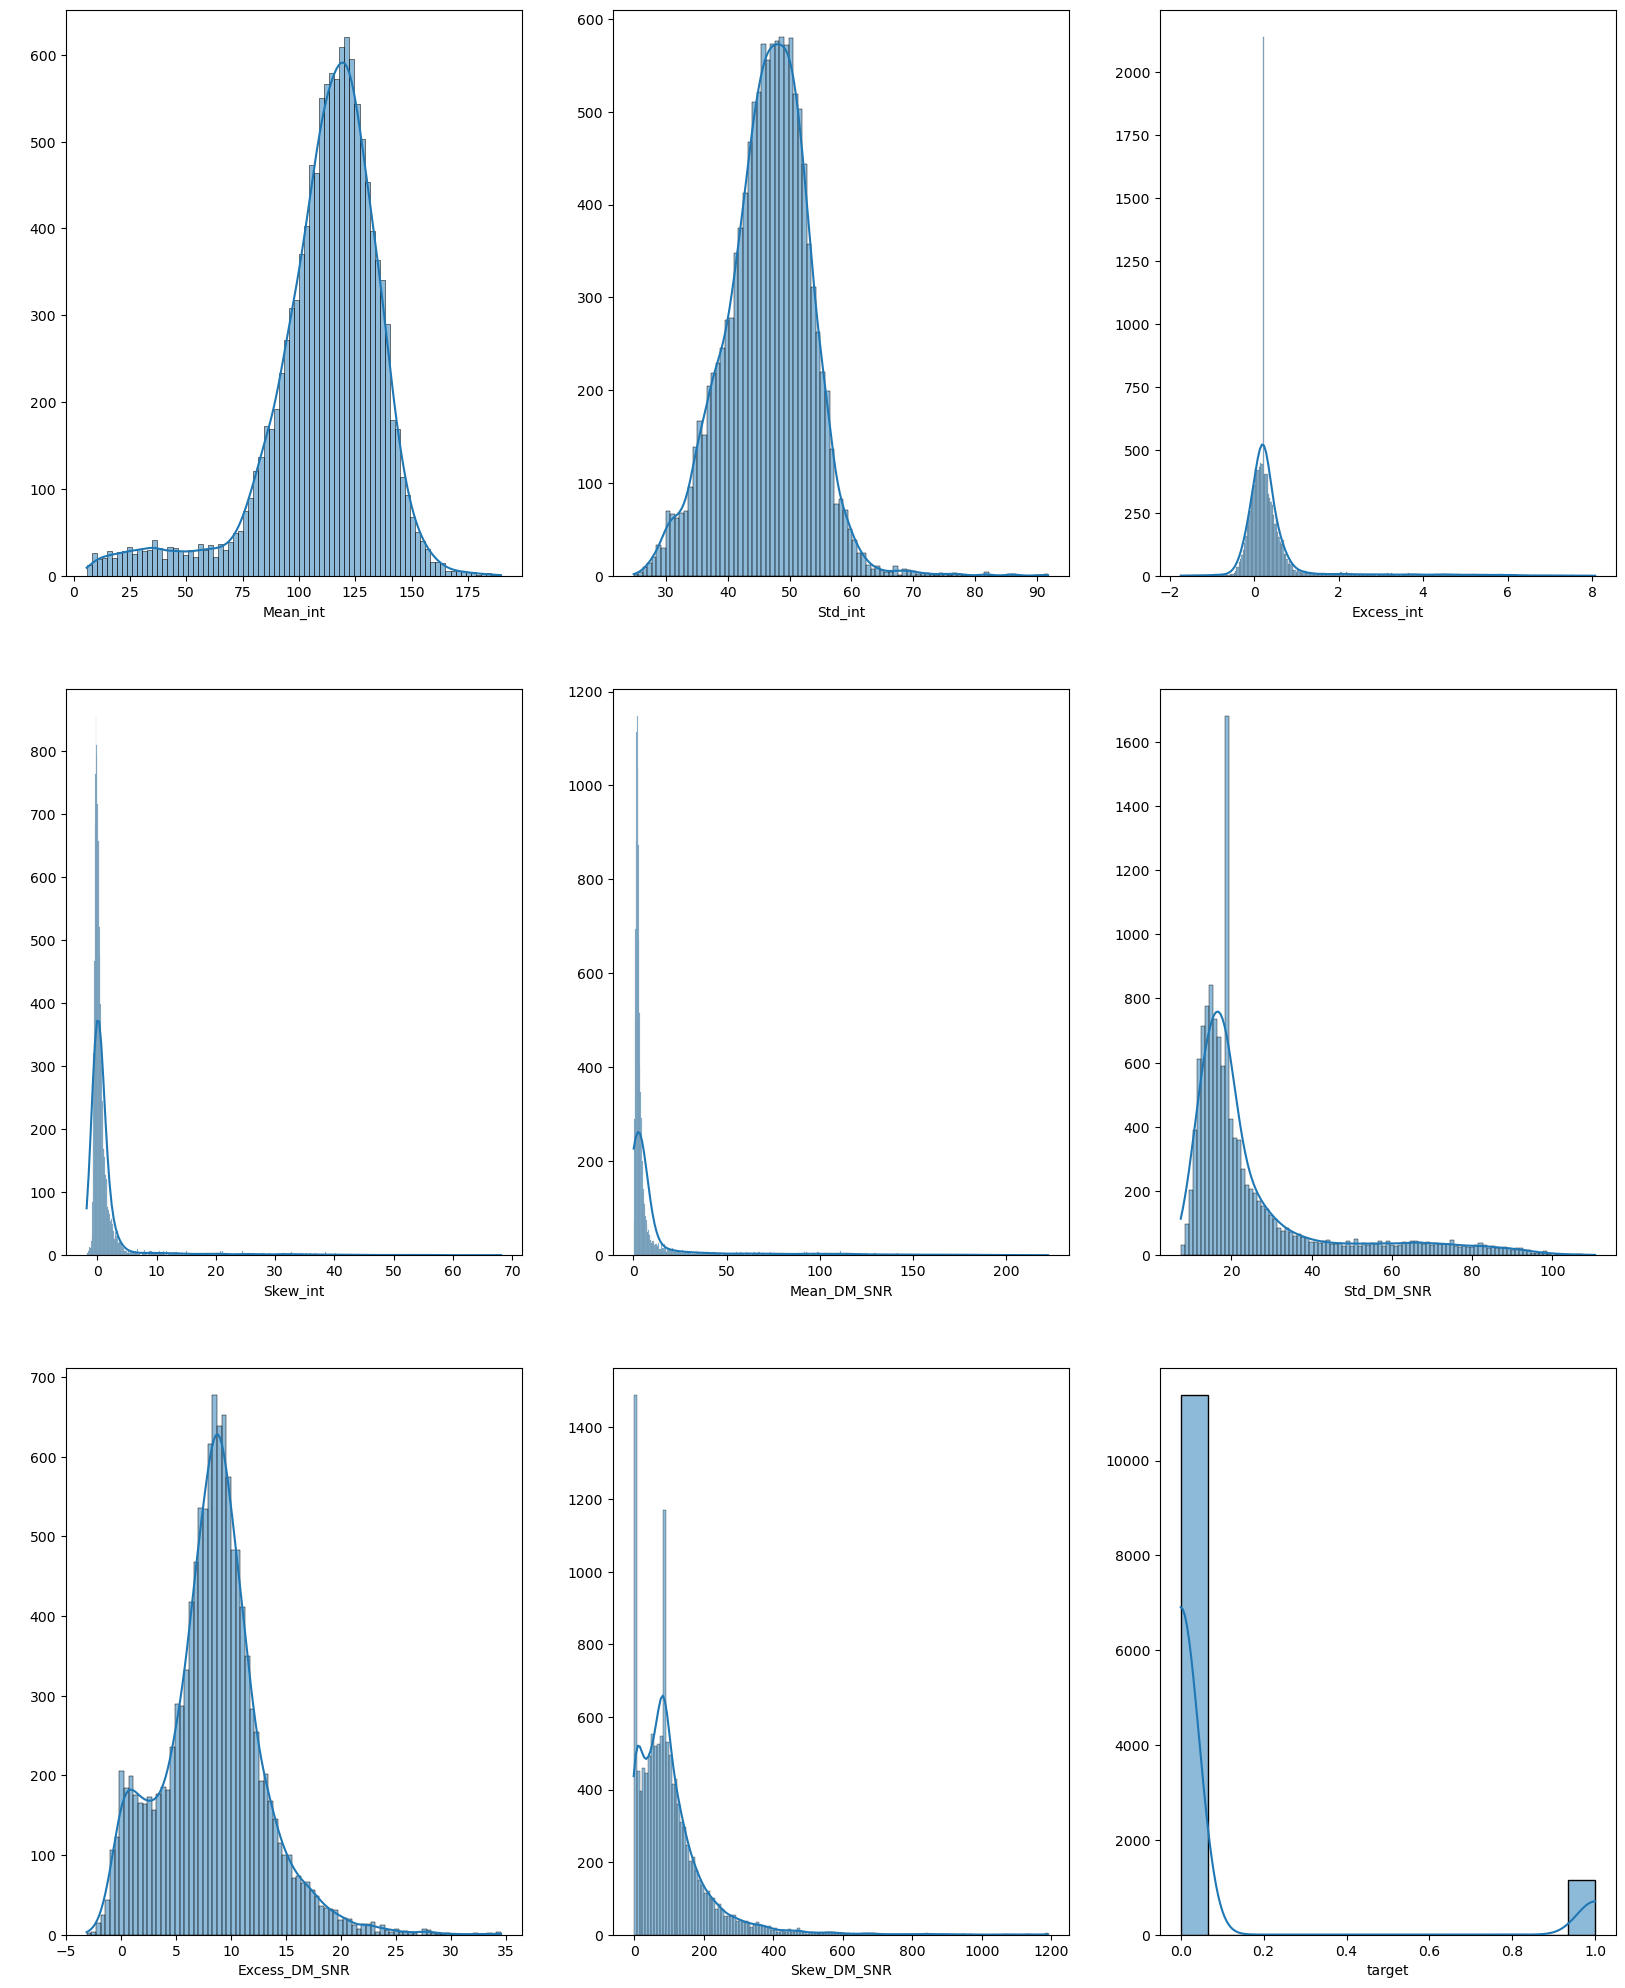

In [10]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    ax = plt.subplot(3, 3, plotnumber)
    sns.histplot(data[col], kde = True)
    plt.ylabel(" ")
    plotnumber +=1
plt.show()

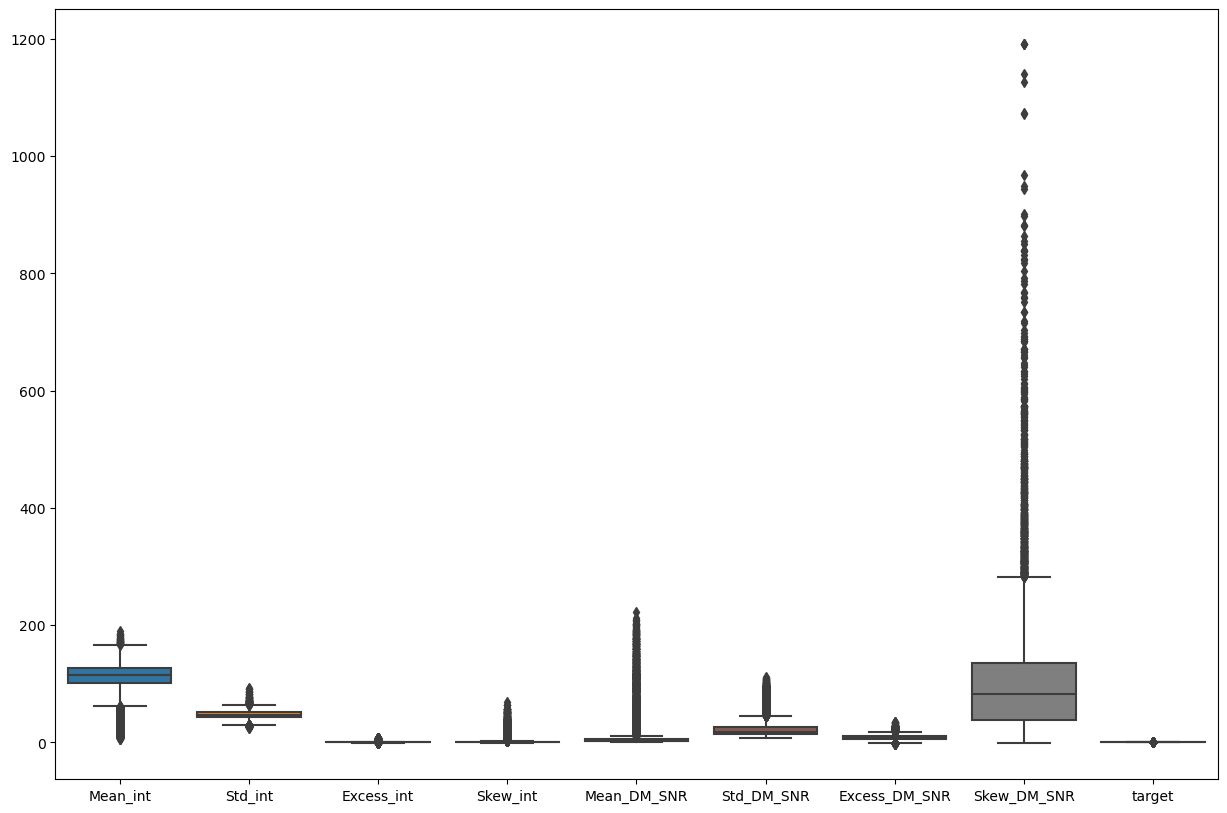

In [11]:
fig, ax = plt.subplots(figsize = (15,10))

sns.boxplot(data = data, ax = ax)

plt.show()

Какие-то сумасшедшие выбросы, возможно из-за того, что я сперва заполнил путые значения медианой

In [12]:
data.head(3)

,Mean_int,Std_int,Excess_int,Skew_int,Mean_DM_SNR,Std_DM_SNR,Excess_DM_SNR,Skew_DM_SNR,target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0


In [13]:
#outliers = data['Skew_DM_SNR'].quantile(0.95)
#data = data[data['Skew_DM_SNR']<outliers]
#outliers = data['Mean_int'].quantile(0.99)
#data = data[data['Mean_int']<outliers]
#outliers = data['Std_int'].quantile(0.99)
#data = data[data['Std_int']<outliers]
#outliers = data['Excess_int'].quantile(0.99)
#data = data[data['Excess_int']<outliers]
#outliers = data['Skew_int'].quantile(0.99)
#data = data[data['Skew_int']<outliers]
#outliers = data['Mean_DM_SNR'].quantile(0.99)
#data = data[data['Mean_DM_SNR']<outliers]
#outliers = data['Std_DM_SNR'].quantile(0.99)
#data = data[data['Std_DM_SNR']<outliers]
#outliers = data['Excess_DM_SNR'].quantile(0.99)
#data = data[data['Excess_DM_SNR']<outliers]

In [14]:
data.shape

(12528, 9)

In [15]:
data['target'].value_counts()

0.0    11375
1.0     1153
Name: target, dtype: int64

Первыя попытка чистки от выбросов была так успешна, что определять уже было нечего, удалил 2/3 датасета, в таргетах остались только 0 )

Потом попробовал еще раз подчистить выбросы, более лояльно, но все равно, очень уж не сбалансированный получается таргет

**2. Определите матрицу признаков и переменную таргета. Разделите трейновый набор трейн и тест с помощью train_test_split. Зафиксируйте размер тестовой выборки 0.2, а рэндом стэйт равный 0.** 

In [16]:
X = data.drop('target', axis = 1)
y = data['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**3. Используя StandartScaler отмасштабируйте матрицу признаков трейн и тест.**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=['Mean_int', 'Std_int', 'Excess_int', 'Skew_int',
       'Mean_DM_SNR', 'Std_DM_SNR', 'Excess_DM_SNR', 'Skew_DM_SNR'])
X_test = pd.DataFrame(X_test, columns= ['Mean_int', 'Std_int', 'Excess_int', 'Skew_int',
       'Mean_DM_SNR', 'Std_DM_SNR', 'Excess_DM_SNR', 'Skew_DM_SNR'])

**4. Обучите SVM Classifier на данных используя GridSearchCV: Попробуйте разные значения С, типа ядер, а так же значение гамма для rbf ядра. Подберите правильную метрику для оценки качества алгоритма. Убедитесь, что значения на тестровой и трейновой выборке сопоставимы и модель не переобучилась.**

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

svc = SVC()

svc.fit(X_train, y_train)

params = {'C': [0.1, 1, 5], 'gamma': [0.001, 0.01, 1],
         'kernel': ['rbf', 'poly']}

gds = GridSearchCV(svc, param_grid=params, cv = 3, n_jobs=-1) # Больше параметров этот компьютер считать не может
                                                              # Иначе он начинает считать неделю
                                                              # Гамму следовало бы увеличить, чтобы найти наилучшую,
                                                              # Но он оооочень долго это все делает, поэтому оставлю так

In [20]:
gds.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5], 'gamma': [0.001, 0.01, 1],
                         'kernel': ['rbf', 'poly']})

In [21]:
gds.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [22]:
svc = gds.best_estimator_

In [23]:
svc.fit(X_train, y_train)
train_pred = svc.predict(X_train)
test_pred = svc.predict(X_test)
print('Train: {0} | Test: {1}'.format(accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)))

Train: 0.9834364398323688 | Test: 0.9800478850758181


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE_train: {0} | MAE_test: {1} \nMSE_train: {2} | MSE_test: {3}'.format(mean_absolute_error(y_train, train_pred),
                                                                               mean_absolute_error(y_test, test_pred),
                                                                               mean_squared_error(y_train, train_pred),
                                                                               mean_squared_error(y_test, test_pred)))

MAE_train: 0.016563560167631212 | MAE_test: 0.019952114924181964 
MSE_train: 0.016563560167631212 | MSE_test: 0.019952114924181964


_Как такое может быть, что мсе и мае абсолютно одинаковые? Может я где-то не заметил ошибку ? Формулы ведь разные_

_Пытался ее найти но безуспешно_ (

**5. Постройте confusion_matrix и classification report.**

In [25]:
confusion_matrix(y_train, train_pred)

array([[9060,   30],
       [ 136,  796]], dtype=int64)

In [26]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9090
         1.0       0.96      0.85      0.91       932

    accuracy                           0.98     10022
   macro avg       0.97      0.93      0.95     10022
weighted avg       0.98      0.98      0.98     10022



In [27]:
confusion_matrix(y_test, test_pred)

array([[2275,   10],
       [  40,  181]], dtype=int64)

In [28]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.82      0.88       221

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.93      2506
weighted avg       0.98      0.98      0.98      2506



**6. Обучите Decision tree classifier на тех же данных, используя GridSearchCV подберите гиперпараметры для модели. Используйте ту же метрику, что и в задаче с SVM. Убедитесь, что алгоритм не переобучился**

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)

dtc.fit(X_train, y_train)

params_tree = {"criterion": ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6],
              'max_features': [None, 1, 2, 3]}

gds_tree = GridSearchCV(dtc, param_grid=params_tree, cv = 5)
gds_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [None, 1, 2, 3]})

In [49]:
gds_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': None}

In [50]:
dtc = gds_tree.best_estimator_

dtc.fit(X_train, y_train)
dtc_pred_train = dtc.predict(X_train)
dtc_pred_test = dtc.predict(X_test)

In [52]:
print("accuracy train tree: {} \naccuracy test tree: {}".format(accuracy_score(y_train, dtc_pred_train),
                                                                 accuracy_score(y_test, dtc_pred_test)))

accuracy train tree: 0.9811414887248054 
accuracy test tree: 0.9760574620909817


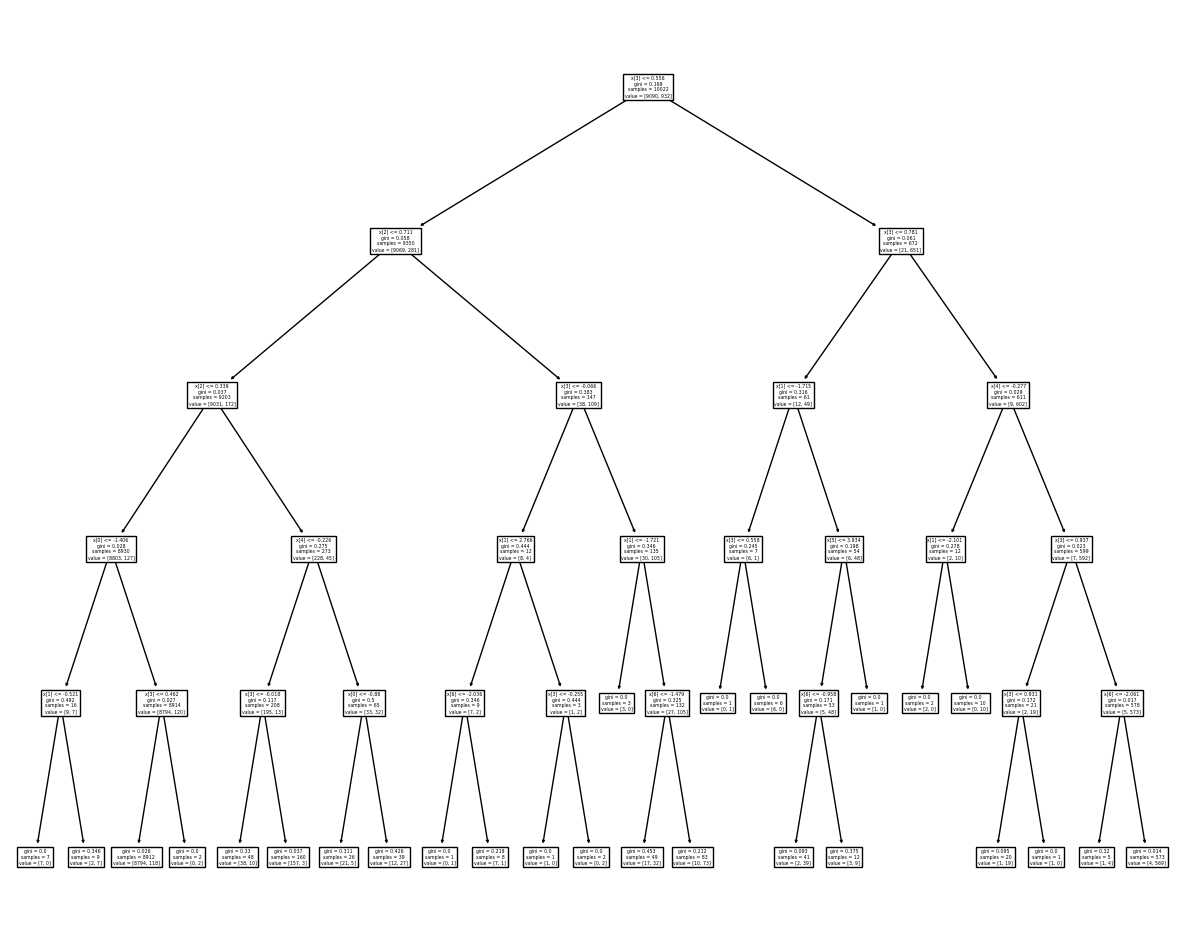

In [56]:
from  sklearn import tree

plt.figure(figsize = (15,12))

tree.plot_tree(dtc.fit(X_train,y_train))
plt.show()

In [67]:
print('MAE_train: {0} | MAE_test: {1} \nMSE_train: {2}  | MSE_test: {3}'.format(mean_absolute_error(y_train, dtc_pred_train),
                                                                               mean_absolute_error(y_test, dtc_pred_test),
                                                                               mean_squared_error(y_train, dtc_pred_train, squared= False),
                                                                               mean_squared_error(y_test, dtc_pred_test, squared = False)))

MAE_train: 0.018858511275194573 | MAE_test: 0.023942537909018357 
MSE_train: 0.13732629491541148  | MSE_test: 0.1547337646055907


_Значения MAE и MSE так же одинковые, почему так, где косяк?_

**7. Постройте confusion_matrix и classification report.**

In [68]:
confusion_matrix(y_train, dtc_pred_train)

array([[9038,   52],
       [ 137,  795]], dtype=int64)

In [69]:
confusion_matrix(y_test, dtc_pred_test)

array([[2270,   15],
       [  45,  176]], dtype=int64)

In [70]:
print(classification_report(y_train, dtc_pred_train))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9090
         1.0       0.94      0.85      0.89       932

    accuracy                           0.98     10022
   macro avg       0.96      0.92      0.94     10022
weighted avg       0.98      0.98      0.98     10022



In [71]:
print(classification_report(y_test, dtc_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2285
         1.0       0.92      0.80      0.85       221

    accuracy                           0.98      2506
   macro avg       0.95      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



**8. Напишите выводы по качеству моделей.**

 ***Модель с использованием SVM показала лучший результат чем дерево, как с ошибками первого класса, так и второго, но ресурсов на расчет она требует в разы больше, что в условиях большого объема данных на слабом железе может занять продолжительное время***

_Аккураси обе модели показали прекрасный, в районе 0.98, но это из-за того, что таргет имеет значительный перекос в сторону 0, и видно, что моделям 0 определить гораздо проще, что и приводит к такому результату_

_Recall и f1-score показывает, что SVM немного лучше удается справиться с определением таргета 1. У SVM recall и f1 - 0.82, 0.88 соотрветственно, против 0.8, 0.85 у tree_

_В целом можно подвести итог, что обе модели показали достаточно неплохой результат_